# Lab Session #2
## Computational Neurophysiology [E010620A]
### Dept of Electronics and Informatics (VUB) and Dept of Information Technology (UGent)
Jorne Laton, Matthias Inghels, Talis Vertriest, Jeroen Van Schependom, Sarah Verhulst

<font color=blue>Student names and IDs:</font> Constantijn Coppers
<br>
<font color=blue>Academic Year:</font> 2023-2024

### General Introduction
In all the practical sessions of this course we will use python 3 and jupyter notebooks. Please install anaconda on your computer and after installation you can open jupyter notebook by typing "jupyter notebook" in the command line. Your browser will open a search directory, which you can use to browse to and open the exercise. Alternatively, you can use jupyter-lab. 

Deadline: 2 weeks after lecture

The lab sessions consist of a jupyter notebook in which the different steps are described and explained, together with the tasks that students are asked to complete.

This practical is based upon the freely available python exercise: https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/adex-model.html

### Context and Goals
This second lab session is focused on the Adaptive Exponential Integrate-and-Fire model. The students are asked to implement the equations as seen in the lecture (and repeated here) and describe what they see in different simulations. 

Whereas most of coding can be done without the BRIAN package, it can be a useful tool to check your own results. 

# Questions
## 1 AdEx Integrate-and-Fire model

In this first part, we will code and develop the Adaptive exponential integrate-and-fire model, without the use of the BRIAN library. To complete this task, start from the theoretical chapter https://neuronaldynamics.epfl.ch/online/Ch6.S1.html and the following equations:

\begin{align*}
    \tau_m \frac{\textrm{d}u}{\textrm{d}t} &= -(u-u_{\textrm{rest}}) + \Delta_T \exp\left(\frac{u-\theta_{\textrm{rh}}}{\Delta_T}\right) -R w + RI(t) \\
    \tau_w \frac{\textrm{d}w}{\textrm{d}t} &= a(u-u_{\textrm{rest}}) - w + b\tau_w \sum_{t^f} \delta(t-t^f)
\end{align*}

The following constants can be used for the model parameters. Note that the BRIAN package uses units. Whereas this is not required for your own coding, make sure that the units match!

* [Import these modules](#P1_import)

In [1]:
# For your own code, use the following variable names. They do not need a unit to be attached as for the BRIAN package.
# tau_m
# R_m
# u_rest
# u_reset
# v_rheobase
# delta_T
# a
# tau_w
# b


### Q1 Generate input current <a id="Q1"/>
Q1a The first step is to generate the input current I(t). For this we create a step function of length 370 ms. The input current is 0 µA at t = 0 and steps to 1 µA at t = 20ms. The input current is reset to 0 µA at t = 200ms. 
Create and plot I_input in function of t and make sure that the time step is 0.01 ms. This timestep corresponds to the integration step when we will solve the differential equations and can remain constant for the purpose of this practical.

Q1b Create a function that outputs u(t), w(t), DeltaU(t) and DeltaW(t) in function of the initial values of u and w (u_0,w_0) and the input current I_input(t). Please also print the time point whenever an action potential is being fired.

Q1c Test this function with the input current that you have defined previously but with an amplitude of 68 µA and create five plots below each other:
- I(t)
- u(t)
- w(t)
- DeltaU(t)
- DeltaW(t)

The initial value of u is u_rest (-70 mV), the inital value of w can be set to zero.

Q1d Describe the evolution between subsequent action potentials. Plot the evolution of these intervals. What do you notice?

* [Fill in answer here](#A1)

## 2 BRIAN Library - I&F models

Here we will implement the non-adaptive and adaptive exponential integrate-and-fire model through the BRIAN package. 

First things first, the non-adaptive I&F model: 
- Again we need to create an input current. Within the BRIAN package the same input profile as before can be easily calculated with the `input_factory.get_step_current()` function
- Next, we need to simulate the model. This can be done through the `exp_IF()` function. Which are the default values of this model? 
- Finally, we plot our output with the `plot_tools.plot_voltage_and_current_traces()` tool. 

### Q2.1 Exponential Integrate and Fire <a id="Q2.1"/>

Apply the suggested functions to simulate the behaviour of a firing neuron when the exponential integrate and fire model is used.
1. Apply a step input current of amplitude 0.9 nA that starts at t = 20 ms and ends at t = 150 ms
2. Simulate what happens for 200 ms

How many spikes do you get?

* [Fill in answer here](#A2.1)

### Q2.2  Adaptive Exponential I&F - BRIAN <a id="Q2.2"/>
What happens when you substitute the non-adaptive by the adaptive exponential model? You can use the `simulate_AdEx_neuron` function. 

1. Apply an input current of amplitude 90 pA that starts at t = 50 ms and ends at t = 150 ms.
2. Simulate what happens for 350 ms using `simulate_AdEx_neuron`

How many spikes are you getting now?

* [Fill in answer here](#A2.2)

### Q2.3 Characteristics <a id="Q2.3"/>
Which are the characteristics of the AdEx model? How many spikes do you observe? Describe the firing pattern.

* [Fill in answer here](#A2.3)

## 3 Firing Pattern

### Q3 Simulate all patterns <a id="Q3"/>

By changing the parameters in the function `AdEx.simulate_AdEx_neuron()`, you can simulate different firing patterns. Create tonic, adapting, initial burst, bursting, irregular, transient and delayed firing patterns. Table 6.1 provides a starting point.

Simulate your model for 350 ms and use a step current of 67 pA starting at t = 50 to t = 250.

* [Fill in answer here](#A3)

## 4 Phase plane and Nullclines
In this section, you will acquire some intuition on shape of nullclines by plotting and answering the following questions.

* [Import these modules](#P4_import)

### Q4.1 Run AdEx <a id="Q4.1"/>
Plot the u and w nullclines of the AdEx model 
1. How do the nullclines change with respect to a?
2. How do the nullclines change if a constant current I(t) = c is applied?
3. What is the interpretation of parameter b?
4. How do flow arrows change as tau_w gets bigger?

For this plot, you won't need the BRIAN library, but you can use functions that are available through numpy. You will need to create a grid of $u,w$ values through np.meshgrid. Next, for each point of this grid, you will have to evaluate the time-derivative (Formulas 6.3 and 6.4). Finally, you will have to calculate the null-clines and plot everything together on a single plot. For the plotting of the arrows, you can have a look at the np.quiver function.

* [Fill in answer here](#A4.1)

### Q4.2 Predict firing pattern <a id="Q4.2">

Can you predict what would be the firing pattern if the value 'a' is small (in the order of 0.01 nS) ? To do so, consider the following 2 conditions:

A large jump b and a large time scale tau_w.
A small jump b and a small time scale tau_w.
Try to simulate the above conditions, to see if your predictions were correct.
    
* [Fill in answer here](#A4.2)

# Answers

## 1 AdEx Integrate-and-Fire model

### Import <a id="P1_import"/>

In [2]:
# Here add all the libraries and modules that are needed throughout the notebook
import math
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2

# Make your graphs color blind friendly
plt.style.use('tableau-colorblind10')

### A1 Generate input current <a id="A1"/>
* [Go back to Q1](#Q1)

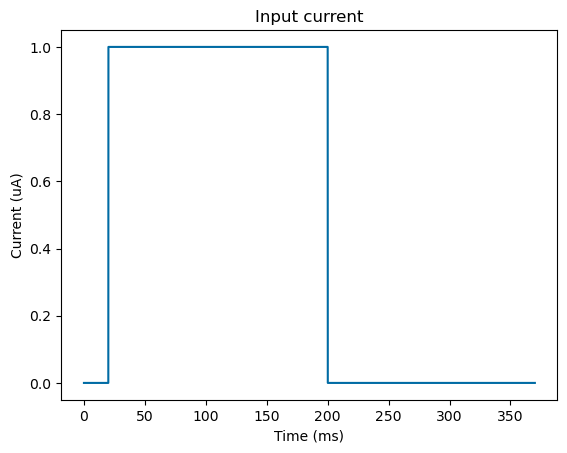

In [3]:
############################# Code for Q1a #############################
# parameters 
T = 370    # ms
dt = 0.01  # ms
I0 = 1     # uA
t1 = 20    # ms
t2 = 200   # ms

# create I_input
def I_input(t):
    return np.where(t < t1, 0, np.where(t < t2, I0, 0))

# plot I_input
t = np.arange(0, T, dt)
plt.plot(t, I_input(t))
plt.xlabel('Time (ms)')
plt.ylabel('Current (uA)')
plt.title('Input current')
plt.show()



In [4]:
############################# Code for Q1b #############################

# Hint: be careful with the units, R_m in GOhm!

def adex(u_0, w_0, I_input, dt = 0.01, T_sim = 370, R_m = 0.500, params = {'R_m': 0.500, 'u_reset':-51, 'u_rest':-70, 'v_rheobase':-50, 'delta_T':2, 'a':0.5, 'tau_w':100, 'tau_m':5, 'b':7}):

    # parameters
    N = int(T_sim / dt)                 # number of time steps
    R_m = params['R_m']                 # GOhm
    u_rest = params['u_rest']           # mV
    u_reset = params['u_reset']         # mV
    v_rheobase = params['v_rheobase']   # mV
    delta_T = params['delta_T']         # ms
    a = params['a']                     # nS
    tau_w = params['tau_w']             # ms
    tau_m = params['tau_m']             # ms
    b = params['b']                     # pA      
    spike_index = []  

    # vector objects
    u, w  = np.zeros(N), np.zeros(N)
    t = np.arange(0, T_sim, dt)
    I = I_input(t)

    # set the initial coonditions
    u[0] = u_0
    w[0] = w_0

    # update the model
    for k in range(1, N):

        # update u, w
        u[k] = u[k-1] + dt/tau_m * (-(u[k-1] - u_rest) + delta_T*np.exp((u[k-1] - v_rheobase) / delta_T) - R_m*w[k-1] + R_m*I[k-1])
        w[k] = w[k-1] + dt/tau_w * (a*(u[k-1] - u_rest) - w[k-1])

        # check if firing occurs
        if u[k-1] > v_rheobase:
            u[k] = u_reset
            w[k] += b
            spike_index.append(k)

    # calculate the derivatives
    delta_us = (u_rest - u + delta_T * np.exp((u-v_rheobase)/delta_T) + R_m*(I - w)) / tau_m
    delta_ws = (a*(u - u_rest) - w) / tau_w
    delta_ws[spike_index] += b

    # construct spike_times
    spike_times = np.array(spike_index) * dt  
        
    return u, w, delta_us, delta_ws, spike_times

In [5]:
############################# Code for Q1b #############################
params_tonic = {'tau_m':20, 'a':0, 'tau_w':30, 'b':60, 'u_reset':-55, 'u_rest': -70, 'delta_T':2, 'R_m':0.500, 'v_rheobase':-50}
params_transient = {'tau_m':10, 'a':1.0, 'tau_w':100, 'b':10, 'u_reset':-60, 'u_rest': -70, 'delta_T':2, 'R_m':0.500, 'v_rheobase':-50}
params_bursting = {'tau_m':5.0, 'a':-0.5, 'tau_w':100, 'b':7.0, 'u_reset':-46, 'u_rest': -70, 'delta_T':2, 'R_m':0.500, 'v_rheobase':-50}
params_irragular = {'tau_m':9.9, 'a':-0.5, 'tau_w':100, 'b':7.0, 'u_reset':-46, 'u_rest': -70, 'delta_T':2, 'R_m':0.500, 'v_rheobase':-50}
u, w, delta_us, delta_ws, spike_times = adex(-70, 0, lambda t: 68*I_input(t)) # I is in pA
print('the timepoints when a spike has occured are:\n {} ms'.format(spike_times))

the timepoints when a spike has occured are:
 [ 24.38  24.8   25.37  26.3   28.67  49.9   79.87 109.15 138.47 167.78
 197.09] ms


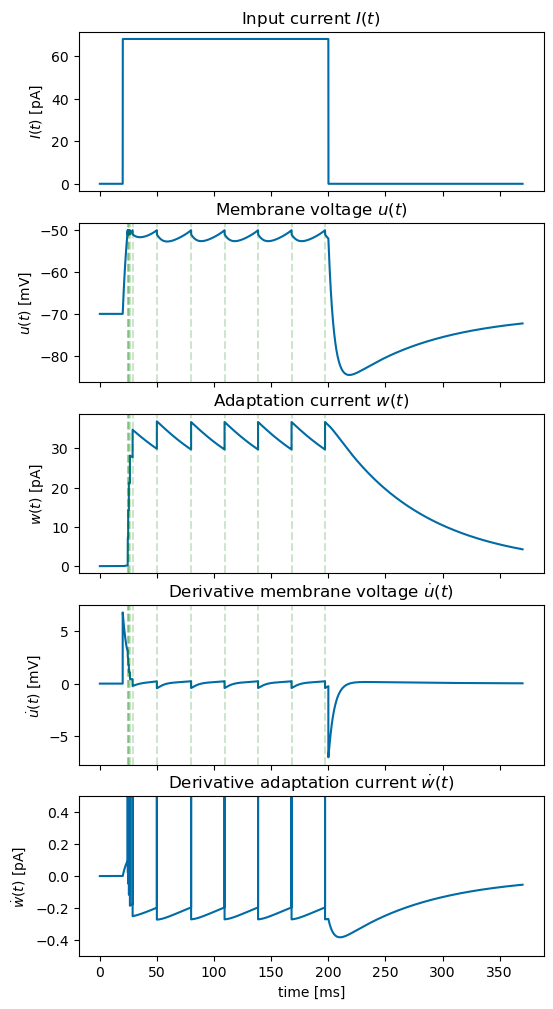

In [6]:
############################# Code for Q1c #############################
fig, axs = plt.subplots(5, 1, figsize = (6,12), sharex = True)
axs[0].plot(t, 68*I_input(t))
axs[1].plot(t, u)
axs[2].plot(t, w)
axs[3].plot(t, delta_us)
axs[4].plot(t, delta_ws)

# plot the spike times on each polot
for ax in axs[1:-1]:
    for spike_time in spike_times:
        ax.axvline(spike_time, color = 'g', linestyle = '--', alpha = 0.2)

axs[0].set_title('Input current $I(t)$')
axs[1].set_title('Membrane voltage $u(t)$')
axs[2].set_title('Adaptation current $w(t)$')
axs[3].set_title('Derivative membrane voltage $\dot{u}(t)$')
axs[4].set_title('Derivative adaptation current $\dot{w}(t)$')

axs[0].set_ylabel('$I(t)$ [pA]')
axs[1].set_ylabel('$u(t)$ [mV]')
axs[2].set_ylabel('$w(t)$ [pA]')
axs[3].set_ylabel(r'$\dot{u}(t)$ [mV]')
axs[4].set_ylabel(r'$\dot{w}(t)$ [pA]')
axs[4].set_xlabel('time [ms]')
axs[4].set_ylim((-0.5, 0.5))

plt.show()

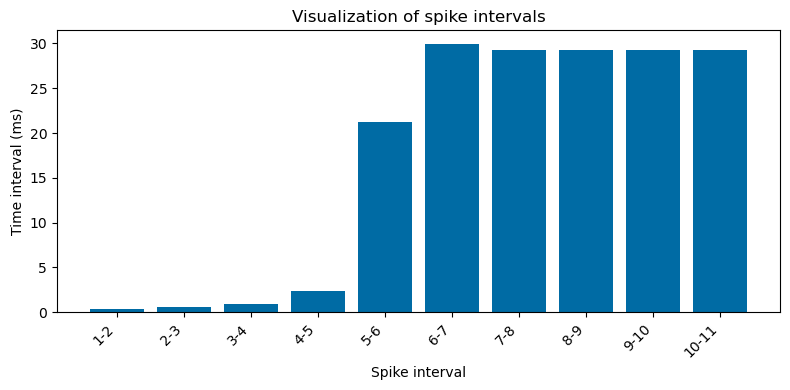

In [7]:
############################# Code for Q1d #############################
spike_intervals =  spike_times[1:] - spike_times[:-1]
labels = [str(i+1)+'-'+str(i+2) for i in range(len(spike_intervals))]

fig, ax = plt.subplots(1, 1, figsize = (8,4))

bars  = plt.bar(labels, spike_intervals)

plt.xticks(rotation=45, ha='right')

# Adding labels and title
plt.title('Visualization of spike intervals')
plt.xlabel('Spike interval')
plt.ylabel('Time interval (ms)')

plt.tight_layout()
plt.show()

<div class="alert alert-success">
<span style="color:black">

**A1 conclusion:** 

For the simulation above, parameters for *Initial Bursting* (Table 6.1) were used.

**0. Mathematics of the AdEx IF model**\
The memebrane potential $u$ in the Adaptive Exponential Integrate-and-Fire (AdEx IF) model, is described by the differential equations:
\begin{align*}
    \tau_m \frac{\textrm{d}u}{\textrm{d}t} &= -(u-u_{\textrm{rest}}) + \Delta_T \exp\left(\frac{u-\theta_{\textrm{rh}}}{\Delta_T}\right) -R w + RI(t) \\
    \tau_w \frac{\textrm{d}w}{\textrm{d}t} &= a(u-u_{\textrm{rest}}) - w + b\tau_w \sum_{t^f} \delta(t-t^f).
\end{align*}
Where $w(t)$ is the adaptation current, that is coupled to the membrane potential by $a$. When the membrane potential reaches the threshold $\theta_{\text{rh}}$ at $t=t^f$, a spike is generated and the membrane potential is reset to $u_{\text{reset}}$. At $t=t^f$, the adaptation current is increased with $b$. After firing, the integration of the membrane potential is again described by the AdEx differential equations. As will be discussed in other conclusions the parameters $a$ and $b$ are the source of the subtreshold adaptation.

**1. Describe the evolution between subsequent action potentials.**\
Just after the generation of a spike $^2$, the membrane potential is reset to $u_{\text{reset}}$ and the adaptation current is increased with $b^2$. While the constant input current still persists, the membrane potential starts integrating again $\dot{u} > 0$ and the adaptation current decreases $\dot{w} < 0^3$. When the membrane potential reaches the threshold again, this procedure starts again. 

**2. Plot the evultion of these intervals.**\
The evolution of the interspiking intervals is plotted in a bar chart (see above).

**3. What do you notice?**\
One can notice that the spiking pattern consists of a *transient* phase just after the onset of the input current and a *steady-state* phase: the neuron starts adapting and (in this case) starts firing in a periodic manner. In the simultaed model above, the transient phase is characterized by an initial burst of firing (short interspike intervals in the bar chart) and the steady state phase exists after 6 spikes (equal interspike intervals in the bar chart).

$^1$ Note that in the plot of $u(t)$ above the 'spikes' are not plotted. The AdEx IF model assumes there is no information in the shape of the spike, and thus plotting the spike itself is thus irrelevant.\
$^2$ You can see the jumps in the plots of $u(t)$ and $w(t)$.\
$^3$ Note that in the plots above there are discontinuities in $\dot{u}(t)$ and $\dot{w}(t)$ due to the incontinuities in $u(t)$ and $w(t)$ at $t=t^f$. This is the result of a computation error because at the $t=t^f$, $\dot{u}(t)$ and $\dot{w}(t)$ are not defined! So, if I discuss $\dot{u}(t)$ or $\dot{w}(t)$, I only consider the values where they exist: $t\in \text{dom}(\dot{u})$ or $t\in \text{dom}(\dot{w})$ respectively.
</span>

## 2 BRIAN Library - I&F models

### Import

In [8]:
%matplotlib inline
import brian2 as b2
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory
from neurodynex3.adex_model import AdEx

### A2.1 Exponential Integrate and Fire <a id="A2.1"/>
* [Go back to Q2.1](#Q2.1)

WARNING    Cannot use Cython, a test compilation failed: Cython is not available (ImportError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


n_spikes: 11


(<AxesSubplot:ylabel='Input current [A] \n min: 0.0 \nmax: 9.000000000000001e-10'>,
 <AxesSubplot:xlabel='t [ms]', ylabel='membrane voltage [mV]\n min: -0.065\n max: -0.03'>)

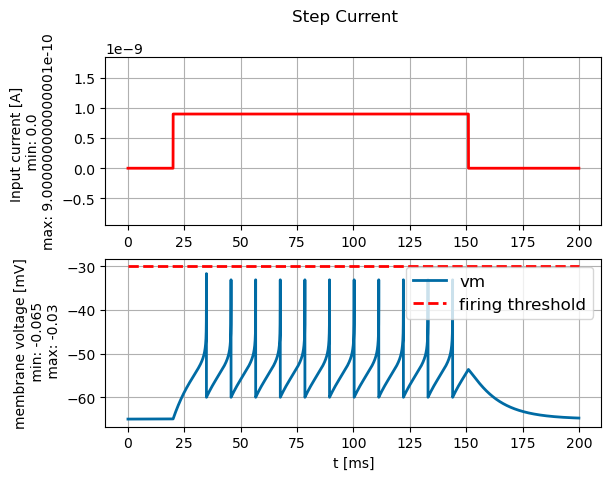

In [9]:
############################# Code for Q2.1 #############################
# set_current
t_start, t_end = 20, 150
A = 0.9
I_input = input_factory.get_step_current(t_start, t_end, b2.ms, A*b2.nA)

# simulation of the model (What are the default values of this model?)
T_sim = 200
state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=I_input, simulation_time = T_sim * b2.ms)
n_spikes = spike_monitor.count[0]
print("n_spikes: {}".format(n_spikes))

# plot the output of the model
plot_tools.plot_voltage_and_current_traces(state_monitor, I_input, title = 'Step Current', firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)

<div class="alert alert-success">
<span style="color:black">

**A2.1 conclusion:**\
In the simulation above, one can observe a that a periodic firing pattern occurs. I.e. there is not transient phase. In total 11 spikes were generated.
    
</span>

### A2.2 Adaptive Exponential I&F - BRIAN <a id="A2.2"/>
* [Go back to Q2.2](#Q2.2)

In [10]:
# getting the default values via the help command and looking in the code for static variables (e.g. V_RESET)
help(exp_IF)

Help on module neurodynex3.exponential_integrate_fire.exp_IF in neurodynex3.exponential_integrate_fire:

NAME
    neurodynex3.exponential_integrate_fire.exp_IF

DESCRIPTION
    Exponential Integrate-and-Fire model.
    See Neuronal Dynamics, `Chapter 5 Section 2 <http://neuronaldynamics.epfl.ch/online/Ch5.S2.html>`_

FUNCTIONS
    getting_started()
        A simple example
    
    simulate_exponential_IF_neuron(tau=12. * msecond, R=20. * Mohm, v_rest=-65. * mvolt, v_reset=-60. * mvolt, v_rheobase=-55. * mvolt, v_spike=-30. * mvolt, delta_T=2. * mvolt, I_stim=<brian2.input.timedarray.TimedArray object at 0x7f872d876730>, simulation_time=200. * msecond)
        Implements the dynamics of the exponential Integrate-and-fire model
        
        Args:
            tau (Quantity): Membrane time constant
            R (Quantity): Membrane resistance
            v_rest (Quantity): Resting potential
            v_reset (Quantity): Reset value (vm after spike)
            v_rheobase (Quantity)

n_spikes: 13


(<AxesSubplot:ylabel='Input current [A] \n min: 0.0 \nmax: 9e-11'>,
 <AxesSubplot:xlabel='t [ms]', ylabel='membrane voltage [mV]\n min: -0.09254298403319838\n max: -0.03'>)

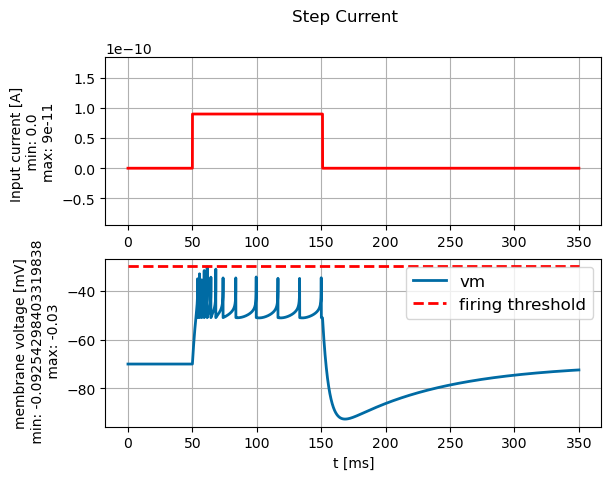

In [11]:
############################# Code for Q2.2 #############################
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

# set_current
t_start, t_end = 50, 150
A = 90
I_input = input_factory.get_step_current(t_start, t_end, b2.ms, A*b2.pA)

# simulation of the model (What are the default values of this model?)
T_sim = 350
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim = I_input, simulation_time = T_sim * b2.ms)
n_spikes = spike_monitor.count[0]
print("n_spikes: {}".format(n_spikes))

# plot the output of the model
plot_tools.plot_voltage_and_current_traces(state_monitor, I_input, title = 'Step Current', firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)

### A2.3 Characteristics <a id="A2.3"/>
* [Go back to Q2.3](#Q2.3)

<div class="alert alert-success">
<span style="color:black">

**A2.2 and A2.3 answer:** 
    
**1. Characteristics of the AdEx model**\
Lets break down the characteristics of AdEx by explaining its name:


1. **Exponential:** The model incorporates a nonlinear function $f(u)$ inspired by empirical data. This function comprises a linear leak term and an exponential activation term:
$$
f(u) = \underbrace{-(u-u_{\textrm{rest}})}_{\text{linear leak}} + \underbrace{\Delta_T \exp\left(\frac{u-\theta_{\textrm{rh}}}{\Delta_T}\right)}_{\text{exponential activation term}}.
$$ 
$\Delta_T$ is the sharpness of action potential initiation and $\theta_{\textrm{rh}}$ the rheobase threshold (see further on for interpretation).

2. **Adaptation:** AdEx features a single adaptation current $w$, which evolves with the time constant $\tau_w$ and according to a differential equation (6.4) involving parameters $a$, and $b$. The parameters $a$ and $b$ relate to the dynamics of ion channels. The parameter $a$ governs the coupling between the adaptation current $w$ and the membrane potential $u$, while $b$ influences the increase in the current at spike times. These parameters shape the spiking pattern of the neuron, hence characterizing the 'Adaptive' aspect of the model. 

3. **Integrate-and-fire dynamics:** The model assumes that the information encoded in neuronal activity primarily resides in the spike pattern rather than the precise shape action potentials. Consequently, when the membrane potential reaches a certain threshold $\theta_{\text{rh}}$, it triggers a spike, after which the membrane potential is reset and the adaptation current increased by $b$. This feature underscores the 'Integrate-and-Fire' nature of the AdEx model. Altough $f$ is nonlinear it still remains simple enough to predict the firing pattern in response to a constant input current.


**2. Obsereved spikes**\
In total 13, spikes were observed. However, the duration of the current in Q2.1 is longer so you can not absolutely compare them. Though you can state that there will be more spikes evoked in Q2.2 model since the current duration there was shorter and lead to a higher number of evoked spikes. 

**3. Firing pattern**\
In contrast to the firing pattern observed in the simulation of Q2.1, where the model exhibits a regular spiking pattern from the beginning, the simulation in Q2.2 initially displays a burst of spikes followed by a transition to a regular spiking pattern. This initial burst of spikes characterizes the transient phase of the firing pattern, which eventually evolves into a steady-state phase of regular spiking.

The difference in firing patterns between Q2.1 and Q2.2 arises from the inclusion of adaptation mechanisms in Q2.2. Specifically, the adaptation mechanism modeled in Q2.2 contributes to the transient phase, leading to the observed burst of spikes. In contrast, Q2.1 does not incorporate any adaptation mechanism, resulting in a periodic spiking pattern without a transient phase.

Therefore, the presence of the transient phase in Q2.2, driven by adaptation dynamics, leads to a higher number of spikes compared to Q2.1, where no such transient phase is modeled. 
</span>

## 3 Firing Pattern

### A3 Simulate all patterns <a id="A3"/>
* [Go back to Q3](#Q3)

In [12]:
# fixed parameters #
# step current
t_start, t_end = 50, 250
A = 67
I_input = input_factory.get_step_current(t_start, t_end, b2.ms, A*b2.pA)

# simulation parameters
u_rest = - 70 * b2.mV
delta_T = 2 * b2.mV
v_rheobase = - 50 * b2.mV
R_m = 500 * b2.Mohm

# check how to define the parameters
# help(AdEx)

n_spikes: 4


(<AxesSubplot:ylabel='Input current [A] \n min: 0.0 \nmax: 6.7e-11'>,
 <AxesSubplot:xlabel='t [ms]', ylabel='membrane voltage [mV]\n min: -0.07782595293635844\n max: -0.03'>)

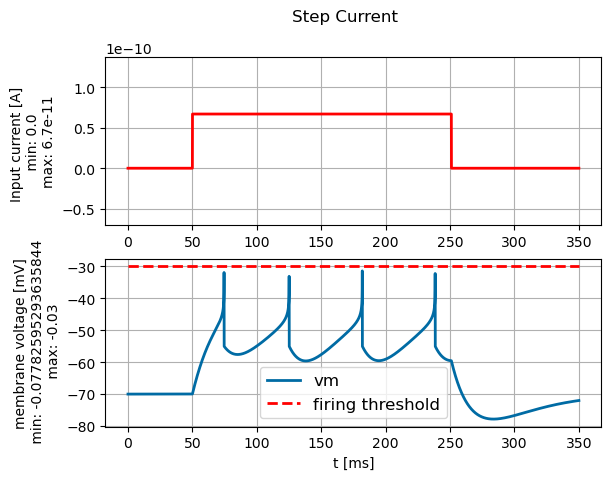

In [13]:
#Tonic
# parameters
u_reset =  -55.0 * b2.mV

tau_m = 20.0 * b2.ms
tau_w = 30.0 * b2.ms

a = 0.0 * b2.nS
b = 60 * b2.pA

# simulate the model 
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim = I_input, simulation_time = T_sim * b2.ms, 
                                                         v_reset = u_reset, v_rest = u_rest,  v_rheobase = v_rheobase, delta_T = delta_T,
                                                         tau_m = tau_m, tau_w = tau_w, 
                                                         a = a, b = b, 
                                                         R = R_m)
n_spikes = spike_monitor.count[0]
print("n_spikes: {}".format(n_spikes))

# plot the output of the model
plot_tools.plot_voltage_and_current_traces(state_monitor, I_input, title = 'Step Current', firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)


n_spikes: 9


(<AxesSubplot:ylabel='Input current [A] \n min: 0.0 \nmax: 6.7e-11'>,
 <AxesSubplot:xlabel='t [ms]', ylabel='membrane voltage [mV]\n min: -0.07517755819670704\n max: -0.03'>)

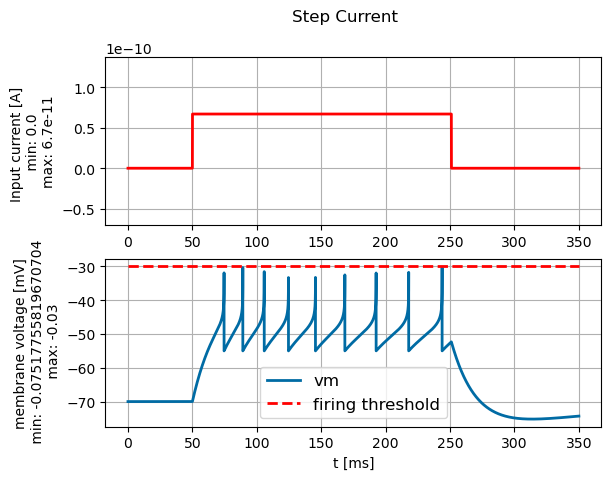

In [14]:
#Adapting
# parameters
u_reset =  -55.0 * b2.mV

tau_m = 20.0 * b2.ms
tau_w = 100.0 * b2.ms

a = 0.0 * b2.nS
b = 5.0 * b2.pA

# simulate the model 
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim = I_input, simulation_time = T_sim * b2.ms, 
                                                         v_reset = u_reset, v_rest = u_rest,  v_rheobase = v_rheobase, delta_T = delta_T,
                                                         tau_m = tau_m, tau_w = tau_w, 
                                                         a = a, b = b, 
                                                         R = R_m)
n_spikes = spike_monitor.count[0]
print("n_spikes: {}".format(n_spikes))

# plot the output of the model
plot_tools.plot_voltage_and_current_traces(state_monitor, I_input, title = 'Step Current', firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)


n_spikes: 10


(<AxesSubplot:ylabel='Input current [A] \n min: 0.0 \nmax: 6.7e-11'>,
 <AxesSubplot:xlabel='t [ms]', ylabel='membrane voltage [mV]\n min: -0.08288515348226169\n max: -0.03'>)

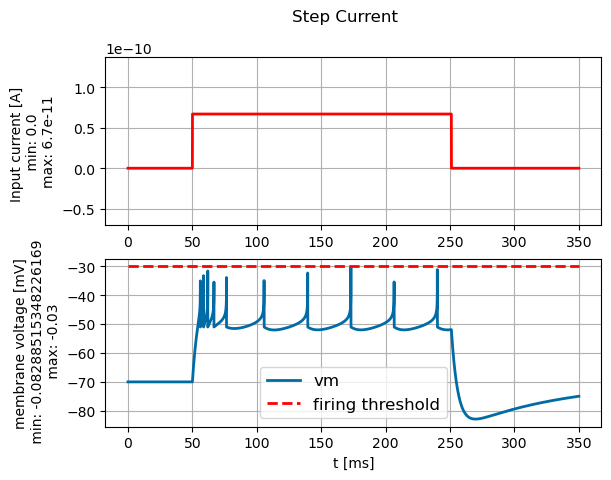

In [15]:
#Initial burst
# parameters
u_reset =  -51.0 * b2.mV

tau_m = 5.0 * b2.ms
tau_w = 100.0 * b2.ms

a = 0.5 * b2.nS
b = 7.0 * b2.pA

# simulate the model 
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim = I_input, simulation_time = T_sim * b2.ms, 
                                                         v_reset = u_reset, v_rest = u_rest,  v_rheobase = v_rheobase, delta_T = delta_T,
                                                         tau_m = tau_m, tau_w = tau_w, 
                                                         a = a, b = b, 
                                                         R = R_m)
n_spikes = spike_monitor.count[0]
print("n_spikes: {}".format(n_spikes))

# plot the output of the model
plot_tools.plot_voltage_and_current_traces(state_monitor, I_input, title = 'Step Current', firing_threshold = exp_IF.FIRING_THRESHOLD_v_spike)


n_spikes: 20


(<AxesSubplot:ylabel='Input current [A] \n min: 0.0 \nmax: 6.7e-11'>,
 <AxesSubplot:xlabel='t [ms]', ylabel='membrane voltage [mV]\n min: -0.09120919402720523\n max: -0.03'>)

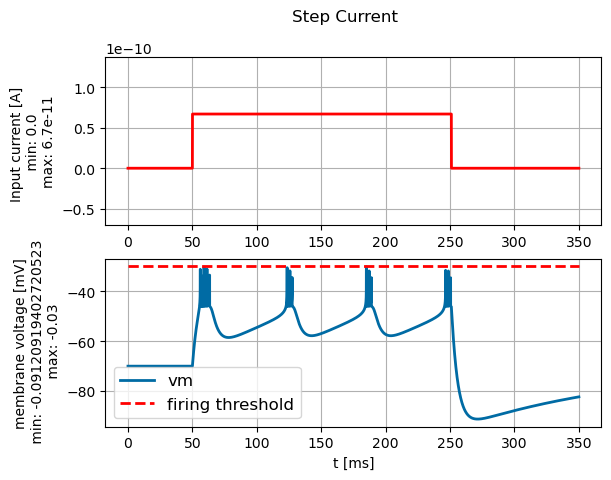

In [16]:
#Bursting
# parameters
u_reset =  -46.0 * b2.mV

tau_m = 5.0 * b2.ms
tau_w = 100.0 * b2.ms

a = -0.5 * b2.nS
b = 7.0 * b2.pA

# simulate the model 
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim = I_input, simulation_time = T_sim * b2.ms, 
                                                         v_reset = u_reset, v_rest = u_rest,  v_rheobase = v_rheobase, delta_T = delta_T,
                                                         tau_m = tau_m, tau_w = tau_w, 
                                                         a = a, b = b, 
                                                         R = R_m)
n_spikes = spike_monitor.count[0]
print("n_spikes: {}".format(n_spikes))

# plot the output of the model
plot_tools.plot_voltage_and_current_traces(state_monitor, I_input, title = 'Step Current', firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)


n_spikes: 18


(<AxesSubplot:ylabel='Input current [A] \n min: 0.0 \nmax: 6.7e-11'>,
 <AxesSubplot:xlabel='t [ms]', ylabel='membrane voltage [mV]\n min: -0.08422235162513644\n max: -0.03'>)

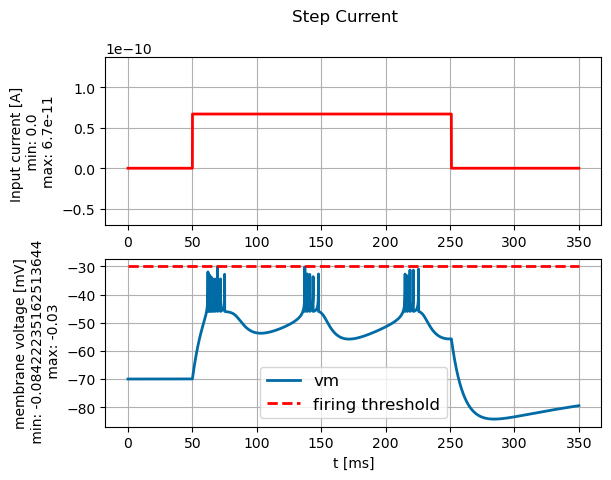

In [17]:
#Irregular
# parameters
u_reset =  -46.0 * b2.mV

tau_m = 9.9 * b2.ms
tau_w = 100.0 * b2.ms

a = -0.5 * b2.nS
b = 7.0 * b2.pA

# simulate the model 
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim = I_input, simulation_time = T_sim * b2.ms, 
                                                         v_reset = u_reset, v_rest = u_rest,  v_rheobase = v_rheobase, delta_T = delta_T,
                                                         tau_m = tau_m, tau_w = tau_w, 
                                                         a = a, b = b, 
                                                         R = R_m)
n_spikes = spike_monitor.count[0]
print("n_spikes: {}".format(n_spikes))

# plot the output of the model
plot_tools.plot_voltage_and_current_traces(state_monitor, I_input, title = 'Step Current', firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)

n_spikes: 5


(<AxesSubplot:ylabel='Input current [A] \n min: 0.0 \nmax: 6.7e-11'>,
 <AxesSubplot:xlabel='t [ms]', ylabel='membrane voltage [mV]\n min: -0.08066502684535987\n max: -0.03'>)

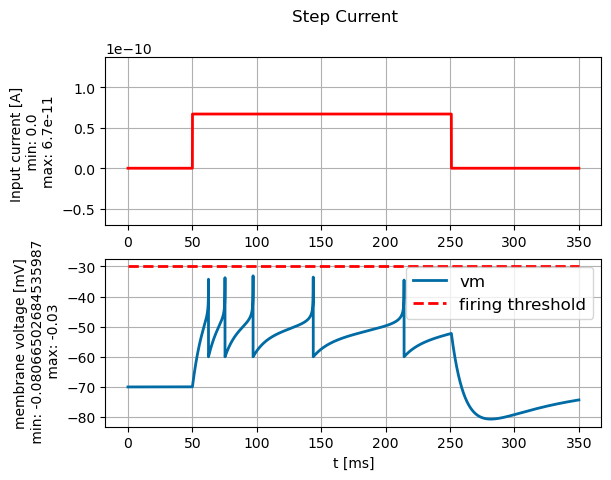

In [18]:
#Transient
# parameters
u_reset =  -60.0 * b2.mV

tau_m = 10.0 * b2.ms
tau_w = 100.0 * b2.ms

a = 1.0 * b2.nS
b = 10.0 * b2.pA

# simulate the model 
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim = I_input, simulation_time = T_sim * b2.ms, 
                                                         v_reset = u_reset, v_rest = u_rest,  v_rheobase = v_rheobase, delta_T = delta_T,
                                                         tau_m = tau_m, tau_w = tau_w, 
                                                         a = a, b = b, 
                                                         R = R_m)
n_spikes = spike_monitor.count[0]
print("n_spikes: {}".format(n_spikes))

# plot the output of the model
plot_tools.plot_voltage_and_current_traces(state_monitor, I_input, title = 'Step Current', firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)

n_spikes: 12


(<AxesSubplot:ylabel='Input current [A] \n min: 0.0 \nmax: 6.7e-11'>,
 <AxesSubplot:xlabel='t [ms]', ylabel='membrane voltage [mV]\n min: -0.08380687910896309\n max: -0.03'>)

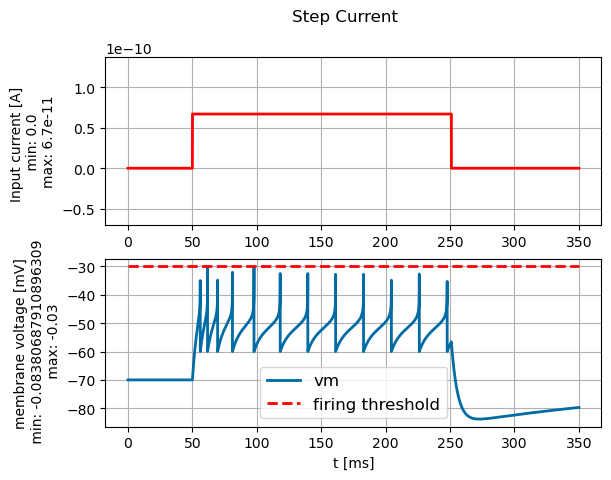

In [19]:
#Delayed
# parameters
u_reset =  -60.0 * b2.mV

tau_m = 5.0 * b2.ms
tau_w = 100.0 * b2.ms

a = -1.0 * b2.nS
b = 10.0 * b2.pA

# simulate the model 
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim = I_input, simulation_time = T_sim * b2.ms, 
                                                         v_reset = u_reset, v_rest = u_rest,  v_rheobase = v_rheobase, delta_T = delta_T,
                                                         tau_m = tau_m, tau_w = tau_w, 
                                                         a = a, b = b, 
                                                         R = R_m)
n_spikes = spike_monitor.count[0]
print("n_spikes: {}".format(n_spikes))

# plot the output of the model
plot_tools.plot_voltage_and_current_traces(state_monitor, I_input, title = 'Step Current', firing_threshold = exp_IF.FIRING_THRESHOLD_v_spike)

## 4 Phase plane and Nullclines

### Import <a id="P4_import"/>

In [20]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

### A4.1 Run AdEx <a id="A4.1"/>
* [Go back to Q4.1](#Q4.1)

In [21]:
# parameters
u_rest = - 70       # mV
delta_T = 2         # mV
v_rheobase = - 50   # mV
R_m = 0.500         #GOhm

u_reset = -51.0     # mV

tau_m = 5.0         # ms
tau_w = 100.0       # ms

a = [0, 0.25, 0.75, 1.0]             # ns
b = 7.0             # pA

# Input function
def I_input(t):
    return np.where(t < t1, 0, np.where(t < t2, I0, 0))

# simulation parameters

T = 370    # ms
dt = 0.01  # ms
t1 = 20    # ms
t2 = 200   # ms

t = np.arange(0, T, dt)

In [22]:
############################# Code for QA4.1 #############################
# create a grid
u_min, u_max = -75, -40 
w_min, w_max = -45, 70  
N = 15

# Create meshgrid for v and w
u_vals = np.linspace(u_min, u_max, N)
w_vals = np.linspace(w_min, w_max, N)
u_grid, w_grid = np.meshgrid(u_vals, w_vals)

# fromuals (6.3) and (6.4)
def du_dt(u, w, I, tau_w = 100.0):
    return (-(u-u_rest) + delta_T * np.exp((u - v_rheobase)/delta_T) - R_m * w + R_m * I) / tau_m

def dw_dt(u, w, a, tau_w = 100.0):
    return (a * (u - u_rest) - w) / tau_w
 
# nullcline functions (set (6.3) & (6.4) to zero and solve for w)
def u_nullcline(u, w, I, tau_w = 100.0):
    return I + 1/R_m*delta_T * np.exp((u - v_rheobase)/delta_T) - 1/R_m*(u - u_rest)

def w_nullcline(u, w, a, tau_w = 100.0):
    return a*(u-u_rest)

**1. How do the nullclines change with respect to a?**

In [23]:
# get the nullclines and vectorfield
w_nc_u = u_nullcline(u_vals, w_vals, 0.0)
w_nc_w_vals = [w_nullcline(u_vals, w_vals, a_i) for a_i in a]

du = du_dt(u_grid, w_grid, 0)
dw_vals = [dw_dt(u_grid, w_grid, a_i) for a_i in a]

In [24]:
# simulate the model 
t_start, t_end = 0, 375
A = 0.0 
I_input = input_factory.get_step_current(t_start, t_end, b2.ms, A*b2.pA)
states = [AdEx.simulate_AdEx_neuron(I_stim = I_input, simulation_time = T * b2.ms, 
                                                         v_reset = u_reset * b2.mV, v_rest = u_rest * b2.mV,  v_rheobase = v_rheobase * b2.mV, delta_T = delta_T * b2.mV, 
                                                         tau_m = tau_m * b2.ms, tau_w = tau_w * b2.ms, 
                                                         a = a_i * b2.nS, b = b * b2.pA, 
                                                         R = R_m * b2.Gohm) for a_i in a] 

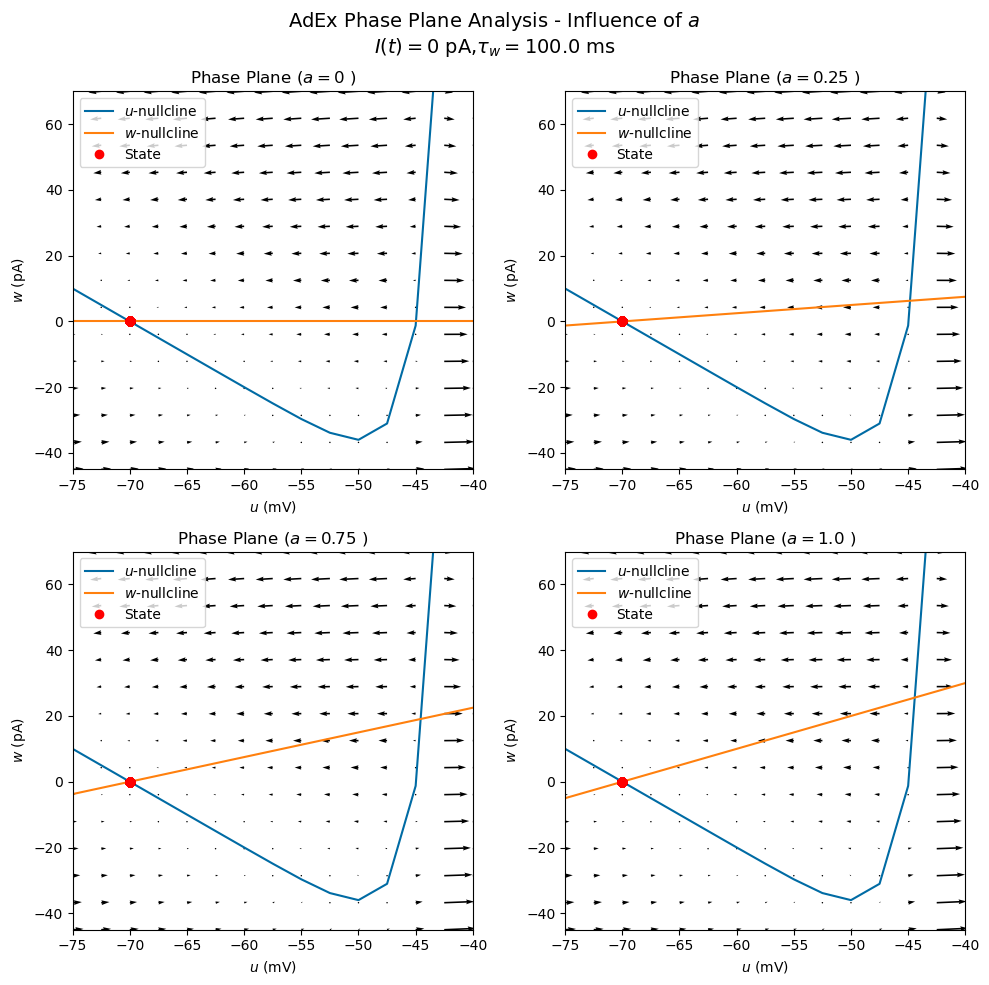

In [25]:

# plot the results
fig, axs = plt.subplots(2, len(a)//2, figsize = (5*len(a)/2, 5*2))

plt.suptitle('AdEx Phase Plane Analysis - Influence of $a$ \n$I(t)=0$ pA,' + r'$\tau_w= {}$ ms'.format(tau_w), fontsize = 14)
for ax, dw_val, w_nc_w_val, a_i, state in zip(axs.flatten(), dw_vals, w_nc_w_vals, a, states):
    # plot the vectorfield
    ax.quiver(u_grid, w_grid, du, dw_val)

    # plot the nullclines
    ax.plot(u_vals, w_nc_u, label = '$u$-nullcline')
    ax.plot(u_vals, w_nc_w_val, label = '$w$-nullcline')

    # plot the state
    state_monitor, spike_monitor = state
    ax.plot(state_monitor.v[0]*1e3, state_monitor.w[0]*1e12, 'ro', label = 'State')

    # lay-out the axes
    ax.set_xlim((u_min, u_max))
    ax.set_ylim((w_min, w_max))

    ax.set_title('Phase Plane ($a = {}$ )'.format(a_i))
    ax.set_xlabel('$u$ (mV)')
    ax.set_ylabel('$w$ (pA)')

    ax.legend()


plt.tight_layout()
plt.show()

**2. How do the nullclines change if a constant current $I(t) = c$ is applied?**

In [26]:
# input currents
c = [30, 42.0, 45.0, 60.0] # pA

# get the nullclines and vectorfield
w_nc_u_vals = [u_nullcline(u_vals, w_vals, c_i) for c_i in c]
w_nc_w = w_nullcline(u_vals, w_vals, a[1])

du_vals = [du_dt(u_grid, w_grid, c_i) for c_i in c]
dw = dw_dt(u_grid, w_grid, a[1]) 


In [27]:
# simulate the model 
t_start, t_end = 20, T + 1
A = 0.0 
I_inputs = [input_factory.get_step_current(t_start, 500, b2.ms, c_i*b2.pA) for c_i in c]
states = [AdEx.simulate_AdEx_neuron(I_stim = I, simulation_time = T * b2.ms, 
                                                         v_reset = u_reset * b2.mV, v_rest = u_rest * b2.mV,  v_rheobase = v_rheobase * b2.mV, delta_T = delta_T * b2.mV, 
                                                         tau_m = tau_m * b2.ms, tau_w = tau_w * b2.ms, 
                                                         a = a[1] * b2.nS, b = 7 * b2.pA, 
                                                         R = R_m * b2.Gohm) for I in I_inputs]

In [28]:
colors = ['#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
          '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5']


def plot_vectorfield(ax, grid_vals, u_v_vals, du_dw_vals, ncs, u_w_min_max = (0, 0, 0, 0), legend = False):

    w_nc_u, w_nc_w = ncs
    du, dw = du_dw_vals
    u_grid, w_grid = grid_vals
    u_vals, w_vals = u_v_vals
    u_min, u_max, w_min, w_max = u_w_min_max 

    # plot the vectorfield
    ax.quiver(u_grid, w_grid, du, dw)

    # plot the nullclines
    ax.plot(u_vals, w_nc_u, label = '$u$-nullcline')
    ax.plot(u_vals, w_nc_w, label = '$w$-nullcline')

    if legend:
        ax.legend()


def plot_state(ax, state):
    
    state_monitor, spike_monitor = state
    u, w = state_monitor.v[0]*1e3, state_monitor.w[0]*1e12
    t = np.array(state_monitor.t) * 1e5
    t_spikes = np.array(spike_monitor.t) * 1e5

    for i in np.arange(len(t_spikes)):        
        if i == 0:
             condition = t < t_spikes[i]
             ax.plot(u[condition], w[condition], color = colors[i])
        
        elif i == len(t_spikes):
             condition = t > t_spikes[i]
             ax.plot(u[condition], w[condition], color = colors[i])
        
        else:
            condition = (t_spikes[i-1] < t) * (t < t_spikes[i])
            ax.plot(u[condition], w[condition], color = colors[i])
    
    if len(t_spikes) == 0:
        ax.plot(u[-1], w[-1], 'ro')

def plot_spikes(axs, state):
    ax1, ax2 = axs

    state_monitor, spike_monitor = state
    t = np.array(state_monitor.t) * 1e3
    t_spikes = np.array(spike_monitor.t) * 1e3
    u, w = state_monitor.v[0] * 1e3, state_monitor.w[0] * 1e12

    for i in np.arange(len(t_spikes)):        
        if i == 0:
             condition = t <= t_spikes[i]
             ax1.plot(t[condition], u[condition], color = colors[i])
             ax2.plot(t[condition], w[condition], color = colors[i])
        
        elif i == len(t_spikes):
             condition = t >= t_spikes[i]
             ax1.plot(t[condition], u[condition], color = colors[i])
             ax2.plot(t[condition], w[condition], color = colors[i])
        
        else:
            condition = (t_spikes[i-1] <= t) * (t < t_spikes[i])
            ax1.plot(t[condition], u[condition], color = colors[i])
            ax2.plot(t[condition], w[condition], color = colors[i])

    if len(t_spikes) == 0:
        ax1.plot(t, u)
        ax2.plot(t, w)

    ax1.set_title('Membrane Potential')
    ax1.set_ylabel('$u(t)$ (mV)')

    ax2.set_title('Adaptation current')
    ax2.set_ylabel('$w(t)$ (pA)')

    ax1.set_xlabel('Time (ms)')
    ax2.set_xlabel('Time (ms)')
    


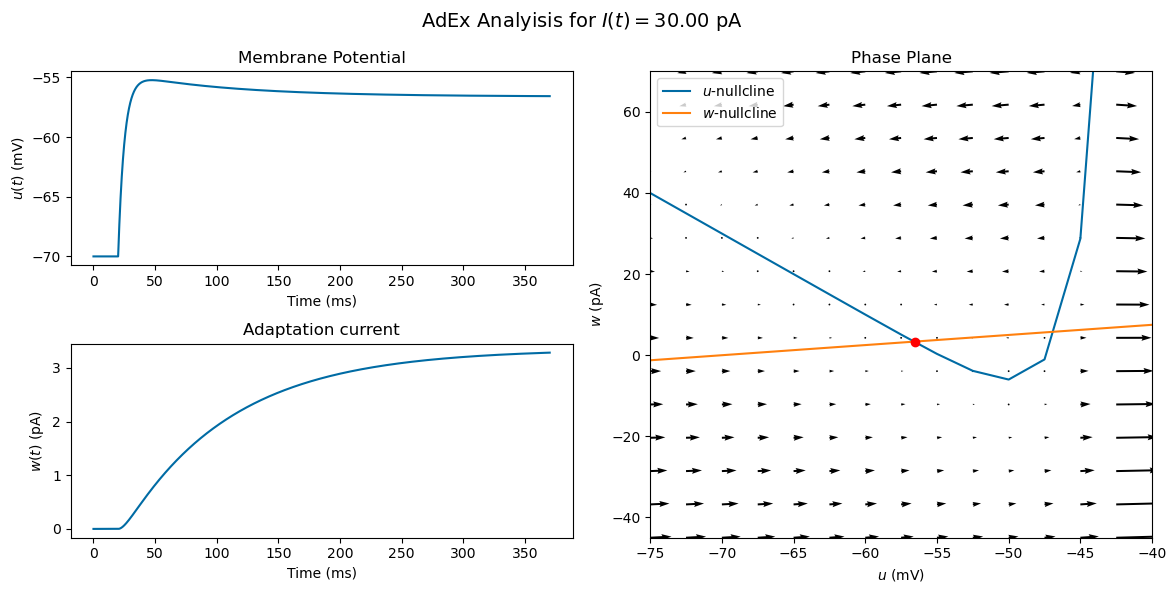

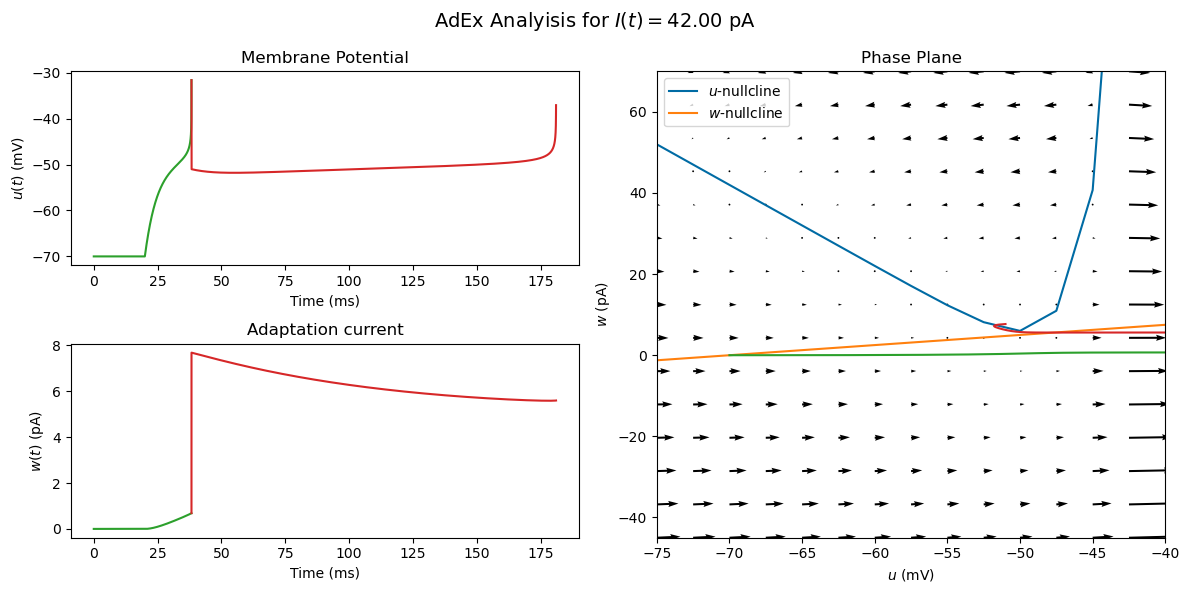

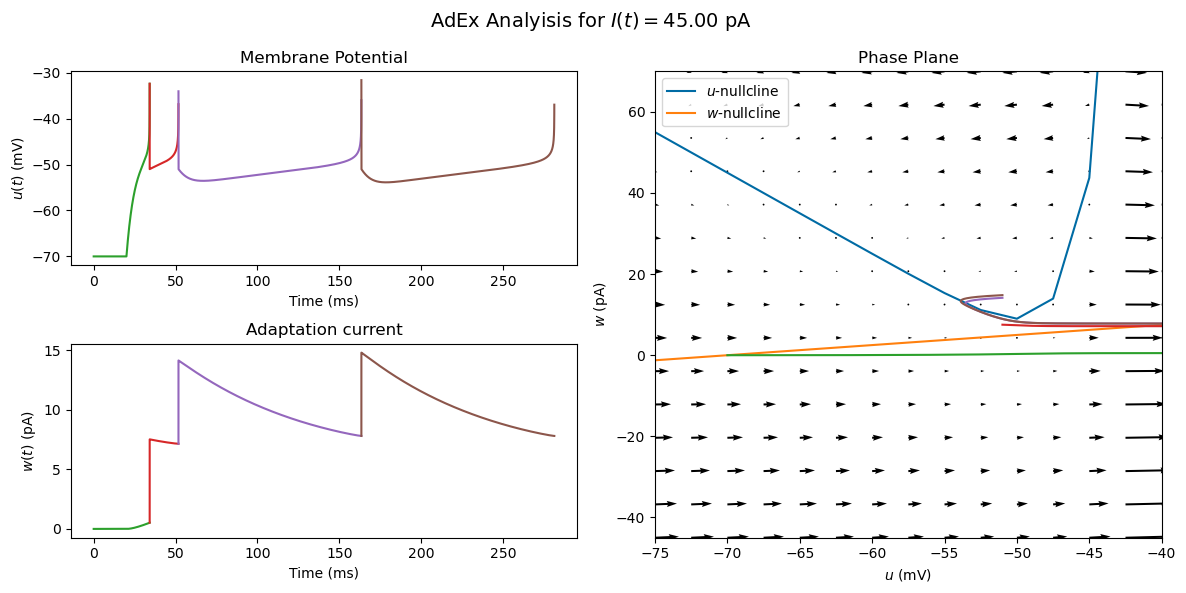

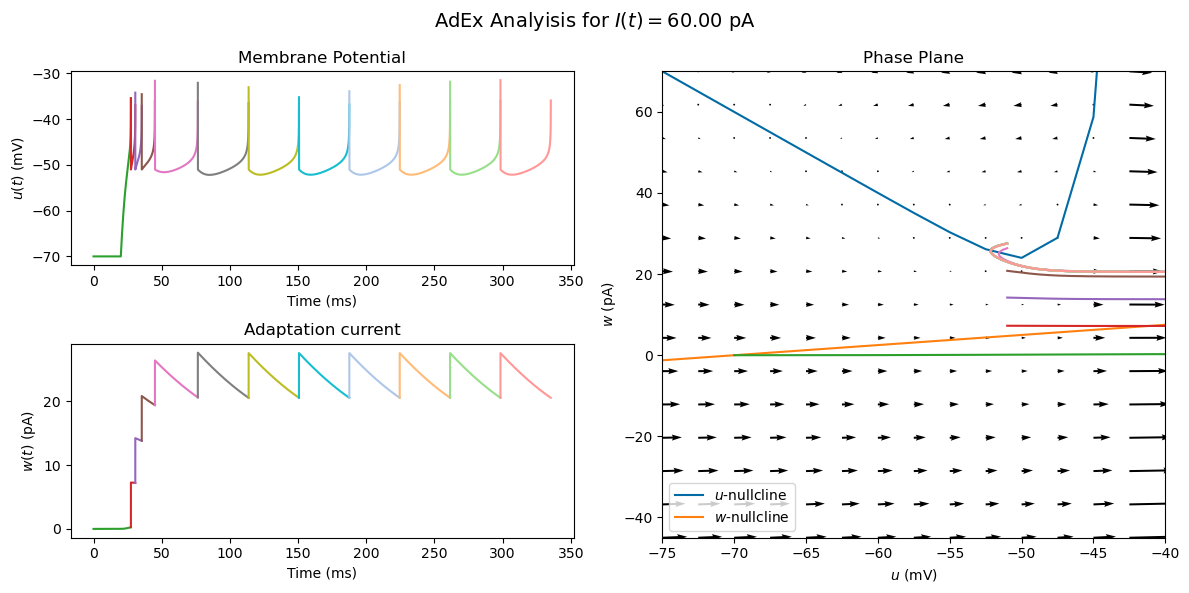

In [29]:
# Create a list to store references to the figures
figures = []


for i in range(4):
    # Create a new figure for each block
    fig = plt.figure(figsize = (12, 6))
    figures.append(fig)  # Store reference to the figure
    
    # Add title for the block
    plt.suptitle(f'AdEx Analyisis for $I(t)={c[i]:.2f}$ pA', fontsize = 14)
    
    # add axes to the figure
    ax11 = fig.add_subplot(2, 2, 1)
    ax12 = fig.add_subplot(2, 2, 3, sharex = ax11)
    ax2 = fig.add_subplot(1, 2, 2)

    state = states[i]
    du = du_vals[i]
    w_nc_u = w_nc_u_vals[i]
    c_i = c[i]

    # plot the vectorfield
    plot_vectorfield(ax2, (u_grid, w_grid), (u_vals, w_vals), (du, dw), (w_nc_u, w_nc_w), legend = True)
    plot_state(ax2, state)
    plot_spikes((ax11, ax12), state)
    
    # lay-out the axes
    ax2.set_xlim((u_min, u_max))
    ax2.set_ylim((w_min, w_max))

    ax2.set_title('Phase Plane')
    ax2.set_xlabel('$u$ (mV)')
    ax2.set_ylabel('$w$ (pA)')

    fig.tight_layout()

# Adjust space between subplots
#plt.subplots_adjust(hspace=0.5)

# Plot all figures below each other
for fig in figures:
    plt.show(fig)


In [ ]:
# THIS CELL GENERATES A VIDEO, IT TAKES A WHILE TO RENDER THE VIDEO #
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Parameters for the simulation
state = states[-1]
state_monitor, spike_monitor = state
t = np.array(state_monitor.t) * 1e3
t_spikes = np.array(spike_monitor.t) * 1e3
u, w =state_monitor.v[0] * 1e3, state_monitor.w[0] * 1e12

w_min2, w_max2 = float(min(w)), float(max(w))
u_min2, u_max2 = float(min(u)), float(max(u))

du = du_vals[-1]
w_nc_u = w_nc_u_vals[-1]
c_i = c[-1]

# Create a new figure for each block
fig = plt.figure(figsize = (12, 6))
    
# Add title for the block
plt.suptitle(f'AdEx Analyisis for $I(t)={c[i]:.2f}$ pA', fontsize = 14)
    
# add axes to the figure
ax11 = fig.add_subplot(2, 2, 1)
ax12 = fig.add_subplot(2, 2, 3)
ax2 = fig.add_subplot(1, 2, 2)


plot_vectorfield(ax2, (u_grid, w_grid), (u_vals, w_vals), (du, dw), (w_nc_u, w_nc_w))


ax11.set_title('Membrane Potential')
ax12.set_title('Adaptation Current')

ax11.set_xlabel('Time (ms)')
ax12.set_xlabel('Time (ms)')

ax11.set_ylim((u_min2, u_max2))
ax12.set_ylim((w_min2 , w_max2))

ax11.set_xlim((0, max(t)))
ax12.set_xlim((0, max(t)))

ax2.set_title('Phase Plane')
ax2.set_xlabel('$u$ (mV)')
ax2.set_ylabel('$w$ (pA)')

ax2.set_xlim((u_min , u_max))
ax2.set_ylim((w_min, w_max + 5))

fig.tight_layout()

def update(frame):
    frame = int(frame)
    ax2.plot(u[:frame], w[:frame], color = 'red')
    ax11.plot(t[:frame], u[:frame], color = 'red')
    ax12.plot(t[:frame], w[:frame], color = 'red')

    return None

ani = FuncAnimation(fig, update, frames = np.arange(0, len(t) + 100, 100), interval = 100)

writer = FFMpegWriter(fps = 10, metadata = dict(artist = 'Constantijn Coppers'), bitrate = 1800)

ani.save('AdeX_analyis_.mp4', writer = writer)


**3. Interpretation of $b$ (pA)**

In [30]:
# b-values
b_vals = [3.0, 7.0, 10.0, 25.0] 

# get the nullclines and vectorfield
w_nc_u = u_nullcline(u_vals, w_vals, c[-1])
w_nc_w = w_nullcline(u_vals, w_vals, a[1])

du = du_dt(u_grid, w_grid, c[-1])
dw = dw_dt(u_grid, w_grid, a[1]) 

# simulate the model 
#t_start, t_end = 20, T + 1
#I_inputs = [input_factory.get_step_current(t_start, 500, b2.ms, c_i*b2.pA) for c_i in c]
states = [AdEx.simulate_AdEx_neuron(I_stim = I_inputs[-1], simulation_time = T * b2.ms, 
                                                         v_reset = u_reset * b2.mV, v_rest = u_rest * b2.mV,  v_rheobase = v_rheobase * b2.mV, delta_T = delta_T * b2.mV, 
                                                         tau_m = tau_m * b2.ms, tau_w = tau_w * b2.ms, 
                                                         a = a[1] * b2.nS, b = b * b2.pA, 
                                                         R = R_m * b2.Gohm) for b in b_vals] 

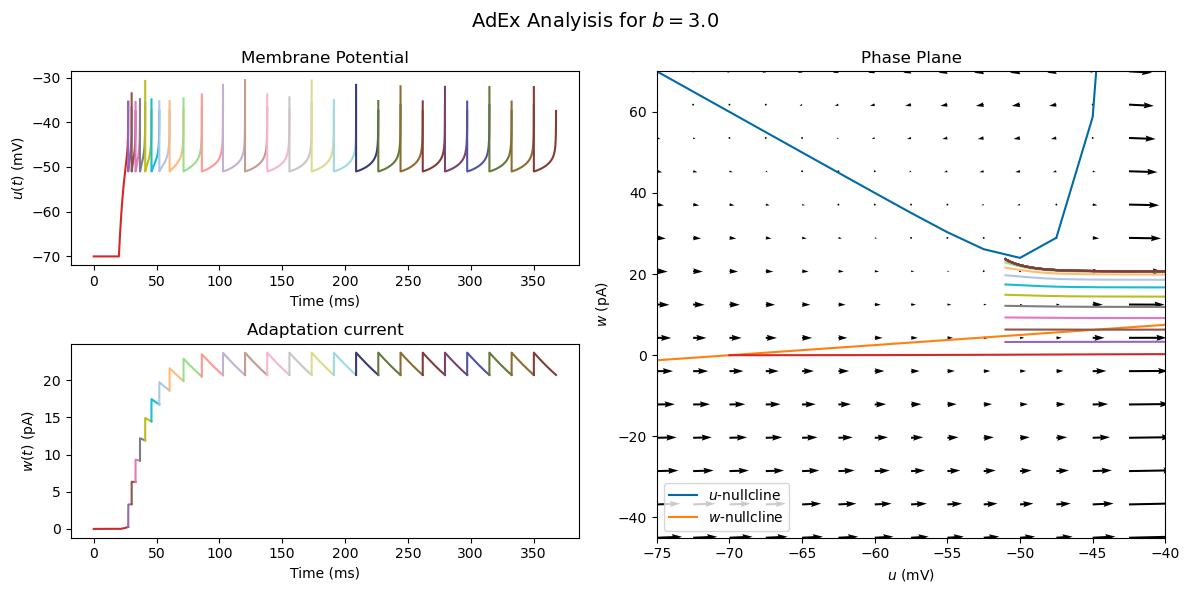

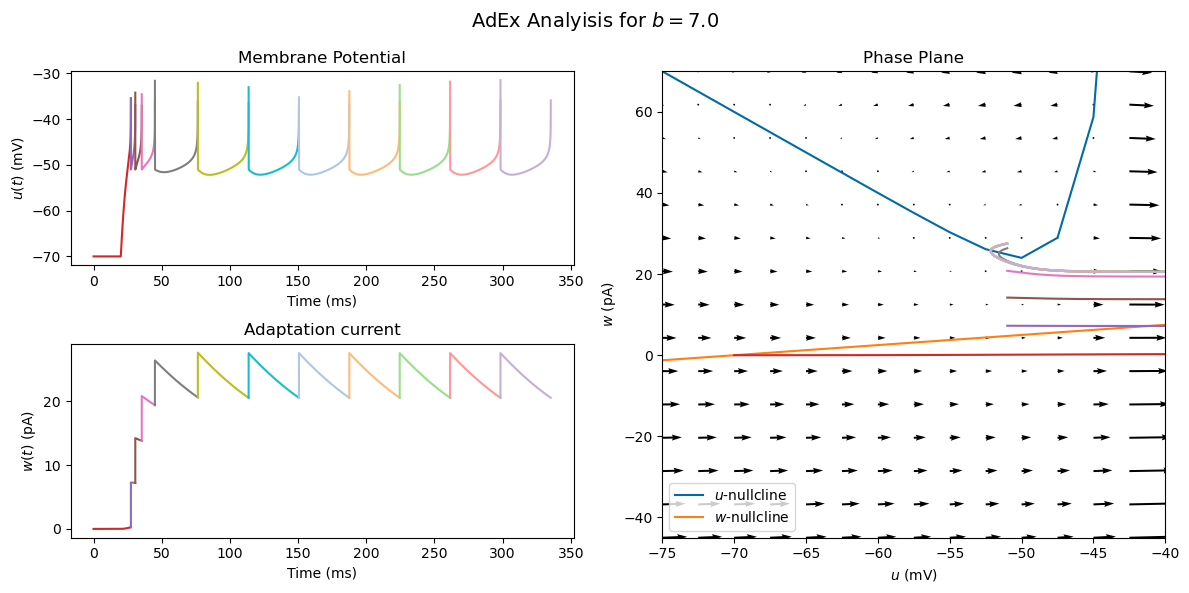

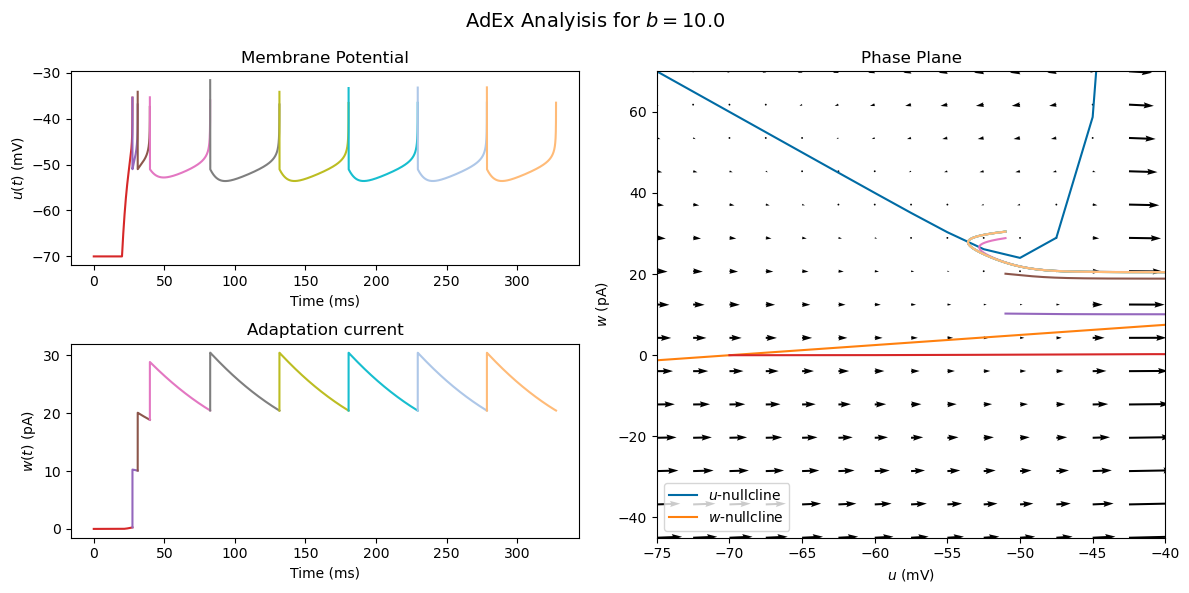

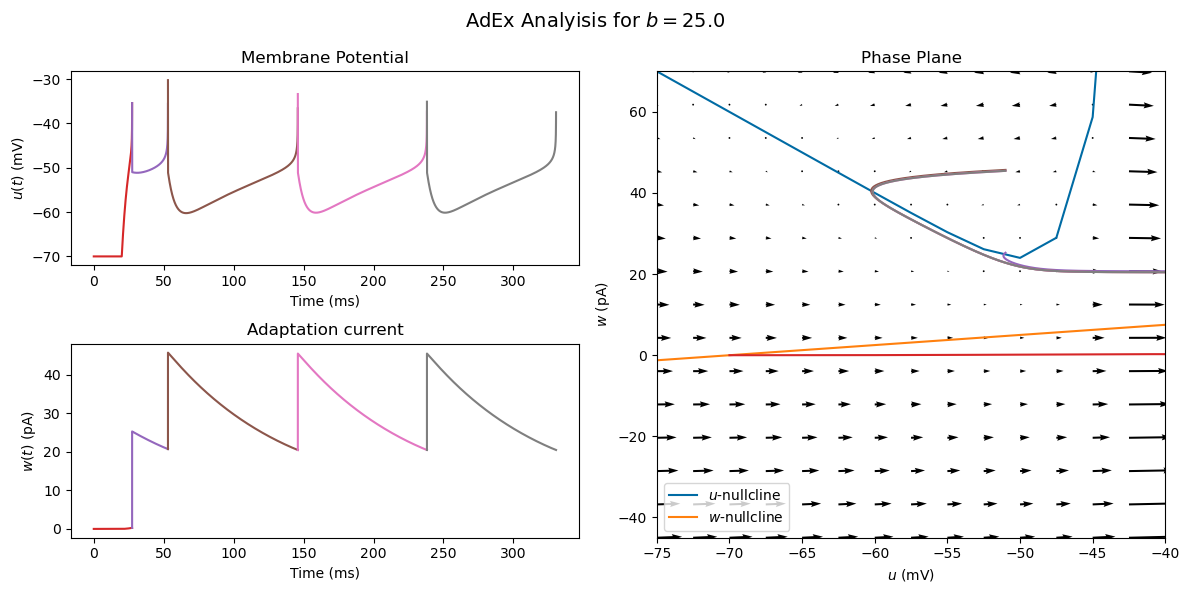

In [31]:
# Create a list to store references to the figures
colors = ['#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
          '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5',
          '#393b79', '#637939', '#8c6d31', '#843c39', '#7b4173',
          '#5254a3', '#637939', '#8c6d31', '#843c39', '#7b4173',
          '#393b79', '#5254a3', '#6b6ecf', '#9c9ede', '#637939',
          '#8c6d31', '#843c39', '#7b4173', '#bd9e39', '#d6616b',
          '#ce6dbd', '#9c9ede', '#edc948', '#8ca252', '#b5cf6b',
          '#c49c94', '#e7ba52', '#e7969c', '#d6616b', '#7b4173']


figures = []


for i in range(len(b_vals)):
    # Create a new figure for each block
    fig = plt.figure(figsize = (12, 6))
    figures.append(fig)  
    
    # Add title for the block
    plt.suptitle(f'AdEx Analyisis for $b={b_vals[i]}$', fontsize = 14)
    
    # add axes to the figure
    ax11 = fig.add_subplot(2, 2, 1)
    ax12 = fig.add_subplot(2, 2, 3)
    ax2 = fig.add_subplot(1, 2, 2)

    state = states[i]

    # plot the vectorfield/...
    plot_vectorfield(ax2, (u_grid, w_grid), (u_vals, w_vals), (du, dw), (w_nc_u, w_nc_w), legend = True)
    plot_state(ax2, state)
    plot_spikes((ax11, ax12), state)
    
    # lay-out the axes
    ax2.set_xlim((u_min, u_max))
    ax2.set_ylim((w_min, w_max))

    ax2.set_title('Phase Plane')
    ax2.set_xlabel('$u$ (mV)')
    ax2.set_ylabel('$w$ (pA)')

    fig.tight_layout()


# Plot all figures below each other
for fig in figures:
    plt.show(fig)


**4. Influence of $\tau_w$**

In [32]:
# tau values
tau_vals = [10.0, 50.0, 200.0] # ms

# get the nullclines and vectorfield
w_nc_u_vals = [u_nullcline(u_vals, w_vals, c[-1], tau_w = tau) for tau in tau_vals] 
w_nc_w_vals = [w_nullcline(u_vals, w_vals, a[1], tau_w = tau) for tau in tau_vals]

du_vals = [du_dt(u_grid, w_grid, c[-1], tau_w = tau) for tau in tau_vals]
dw_vals = [dw_dt(u_grid, w_grid, a[1], tau_w = tau) for tau in tau_vals]

# simulate the model 
#t_start, t_end = 20, T + 1
#I_inputs = [input_factory.get_step_current(t_start, 500, b2.ms, c_i*b2.pA) for c_i in c]
states = [AdEx.simulate_AdEx_neuron(I_stim = I_inputs[-1], simulation_time = T * b2.ms, 
                                                         v_reset = u_reset * b2.mV, v_rest = u_rest * b2.mV,  v_rheobase = v_rheobase * b2.mV, delta_T = delta_T * b2.mV, 
                                                         tau_m = tau_m * b2.ms, tau_w = tau * b2.ms, 
                                                         a = a[1] * b2.nS, b = 15 * b2.pA, 
                                                         R = R_m * b2.Gohm) for tau in tau_vals] 

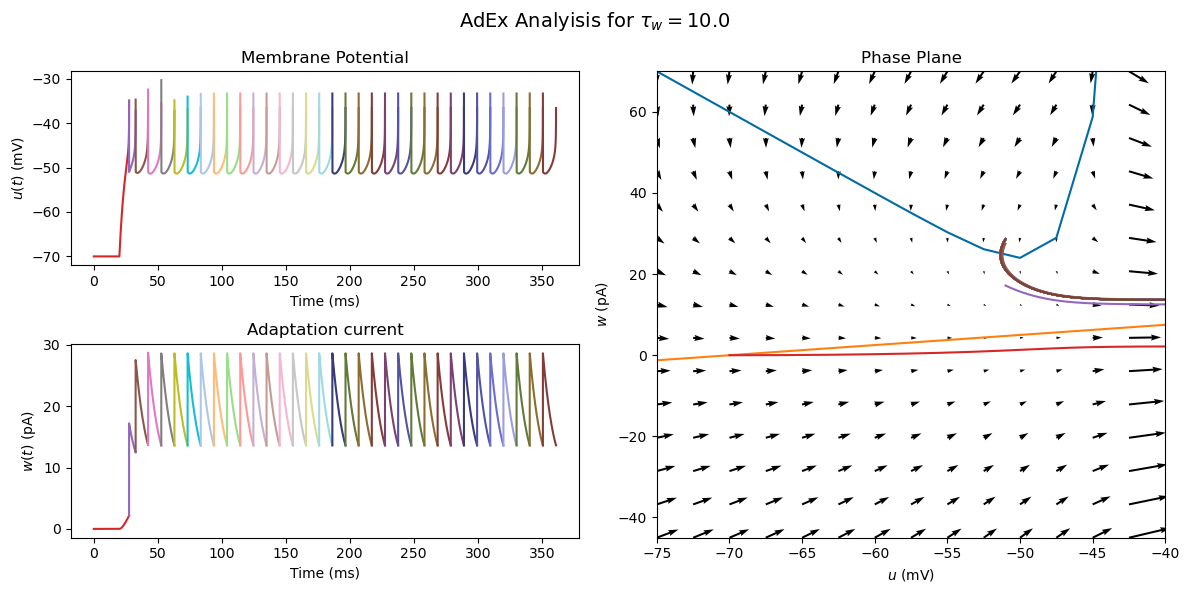

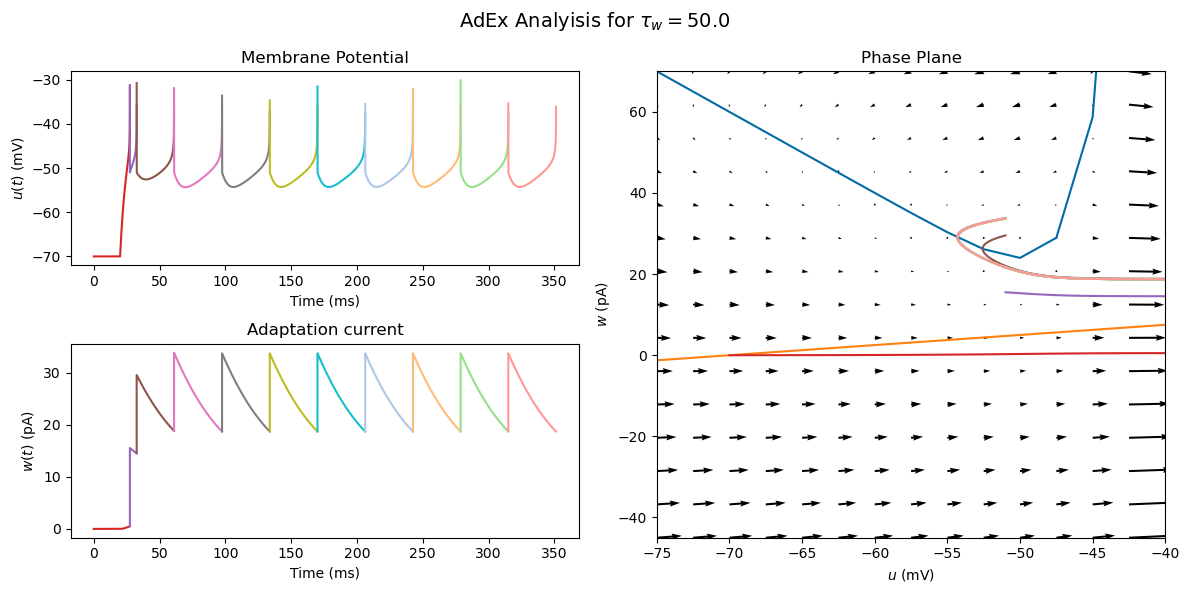

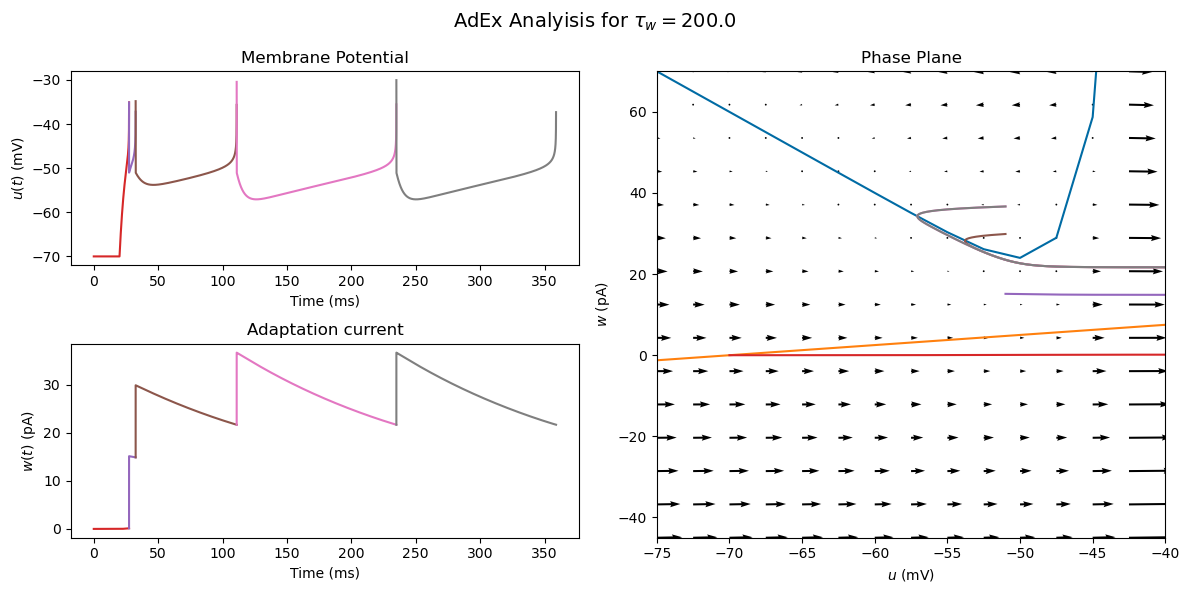

In [33]:
# Create a list to store references to the figures
figures = []


for i in range(len(tau_vals)):
    # Create a new figure for each block
    fig = plt.figure(figsize = (12, 6))
    figures.append(fig)  
    
    # Add title for the block
    plt.suptitle(f'AdEx Analyisis for ' + r'$\tau_w='+f'{tau_vals[i]}$', fontsize = 14)
    
    # add axes to the figure
    ax11 = fig.add_subplot(2, 2, 1)
    ax12 = fig.add_subplot(2, 2, 3)
    ax2 = fig.add_subplot(1, 2, 2)

    state = states[i]
    du, dw = du_vals[i], dw_vals[i]
    w_nc_u, w_nc_w = w_nc_u_vals[i], w_nc_w_vals[i]
    c_i = c[-1]

    # plot the vectorfield/...
    plot_vectorfield(ax2, (u_grid, w_grid), (u_vals, w_vals), (du, dw), (w_nc_u, w_nc_w))
    plot_state(ax2, state)
    plot_spikes((ax11, ax12), state)
    
    # lay-out the axes
    ax2.set_xlim((u_min, u_max))
    ax2.set_ylim((w_min, w_max))

    ax2.set_title('Phase Plane')
    ax2.set_xlabel('$u$ (mV)')
    ax2.set_ylabel('$w$ (pA)')

    fig.tight_layout()


# Plot all figures below each other
for fig in figures:
    plt.show(fig)


<div class="alert alert-success">
<span style="color:black">

**4.1 Answer:** 
    
1. How do the nullclines change with respect to $a$?\
The parameter $a$ is the slope of the linear $w$-nullcline. Increasing $|a|$ increases the slope of the $w$-nullcline. A does not affect the $u$-nullcline. 
2. How do the nullclines change if a constant current $I(t) = c >0$ is applied?\
The $u$-nullcline shifts upwards (downwards) for increasing (decraesing) input current.
3. What is the interpretation of parameter $b$?\
The parameter $b$ is the spike triggered current that depolarizes ($b<0$) or polarizes ($b>0$) the neuron. In the phase plane it corresponds to a vertical jump in the state. The jump is proportional to $|b|$.
4. How do flow arrows change as $\tau_w$ gets bigger?    
The flow arrows are more oriented along the $u$ axis (horizontal).
    
</span>

### A4.2 Predict firing pattern <a id="A4.2">
* [Go back to Q4.2](#Q4.2)

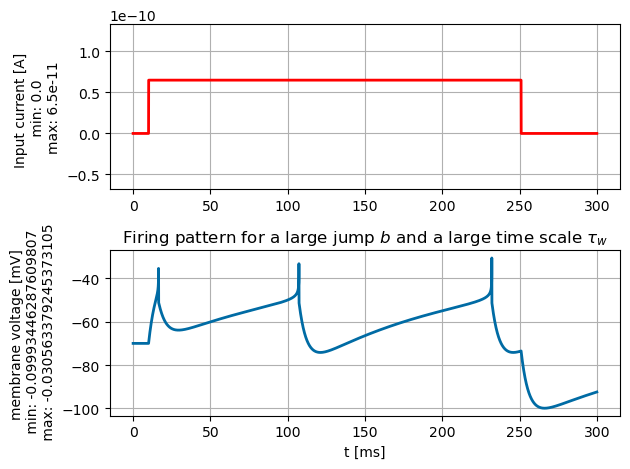

In [34]:
############################# Code for QA4.2 #############################
input_current = input_factory.get_step_current(10, 250, 1*b2.ms, 65*b2.pA)
state_monitor_A, spike_monitor_A = AdEx.simulate_AdEx_neuron(I_stim=input_current, simulation_time=300*b2.ms, a=0.01*b2.nS, b=60*b2.pA, tau_w=100*b2.ms)

plt.figure()
plot_tools.plot_voltage_and_current_traces(state_monitor_A, input_current)
plt.title('Firing pattern for a large jump $b$ and a large time scale '+r'$\tau_w$')
plt.tight_layout()
plt.show()

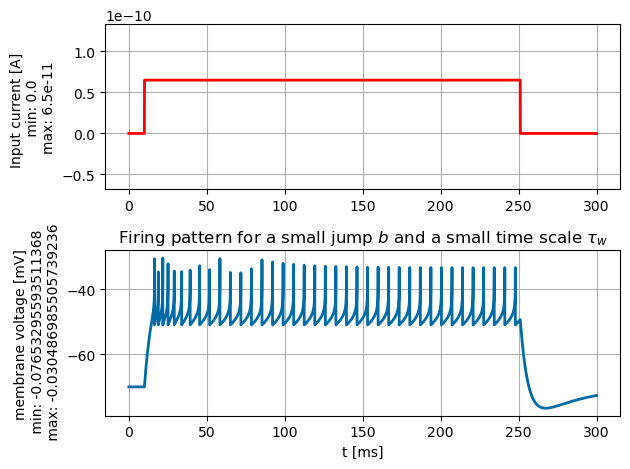

In [35]:
plt.figure()
state_monitor_B, spike_monitor_A = AdEx.simulate_AdEx_neuron(I_stim=input_current, simulation_time=300*b2.ms, a=0.01*b2.nS, b=5*b2.pA, tau_w=30*b2.ms)
plot_tools.plot_voltage_and_current_traces(state_monitor_B, input_current)
plt.title('Firing pattern for a small jump $b$ and a small time scale ' + r'$\tau_w$')
plt.tight_layout()
plt.show()

<div class="alert alert-success">
<span style="color:black">

**4.2 Answer:** 

The $a$ parameter is the coupeling between the adaptation current $w$ and the membrane potential $u$. A value for $a$ of about 0.01 nS corresponds to an almost horizontal (linear) $w$-nullciline. I.e. there is almost no coupeling of $w$ with $u$.

A large jump $b$ will result in a larger time interval between spikes and thus the firing rate will be lower. If $b$ is lower it takes more steps upwards in the phase plane to come in a space where the vertical vectors are more dominant and cause a small detour in the phase plane $^1$. As stated in 4.1, a larger $\tau_w$ value causes more horizonatal oriented vectors and therefore we expect that for large $\tau_w$ values the detour of the state in the phase plane will be higher, which will correspond with a larger interspike interval.

These effects are visible in the figurs above: for small $b$ and large $\tau_w$ there are less spikes generated. 

$^1$ see the video (`AdEx_analysis.mp4`) I have made and look at how the state curve differs (in time) from bottom to top in the phase plane. You van see that around $u$-nullcline, the vectors are smaller in magnitude, so as the state makes jumps (of amount $b$), it migrates to a space where it is less pulled to the right and thus it will take more time to generate a spike.
</span>